In [1]:

import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
from torchvision import transforms

import opt
from net import PConvUNet
from util.io import load_ckpt
from util.image import unnormalize
# from evaluation import evaluate
from my_dataset import MyDataset
import matplotlib.pyplot as plt


root='./my_train'
mask_root='./masks'
save_dir='./snapshots/'
image_size=256
wieghts = './snapshots/default/ckpt/1010100.pth'

device = torch.device('cuda')

size = ( image_size,  image_size)
img_tf = transforms.Compose(
    [transforms.Resize(size=size), transforms.ToTensor(),
     transforms.Normalize(mean=opt.MEAN, std=opt.STD)])
mask_tf = transforms.Compose(
    [transforms.Resize(size=size), transforms.ToTensor()])

dataset_val = MyDataset(root,  mask_root, img_tf, mask_tf, 'val')

model = PConvUNet().to(device)
load_ckpt(wieghts, [('model', model)])

model.eval()
#evaluate(model, dataset_val, device, './results/result4.jpg')

In [43]:
def plot_filters_multi_channel(t):
    
    t = list(t.parameters())[0].cpu()
    num_kernels = t.shape[1]    
    
    #define number of columns for subplots
    num_cols = 12
    #rows = num of kernels
    num_rows = num_kernels
    
    #set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    #looping through all the kernels
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        #for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i][0].detach().numpy(), np.float32)
        #standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        #npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
    plt.savefig('myimage.png', dpi=100)    
    plt.tight_layout()
    plt.show()

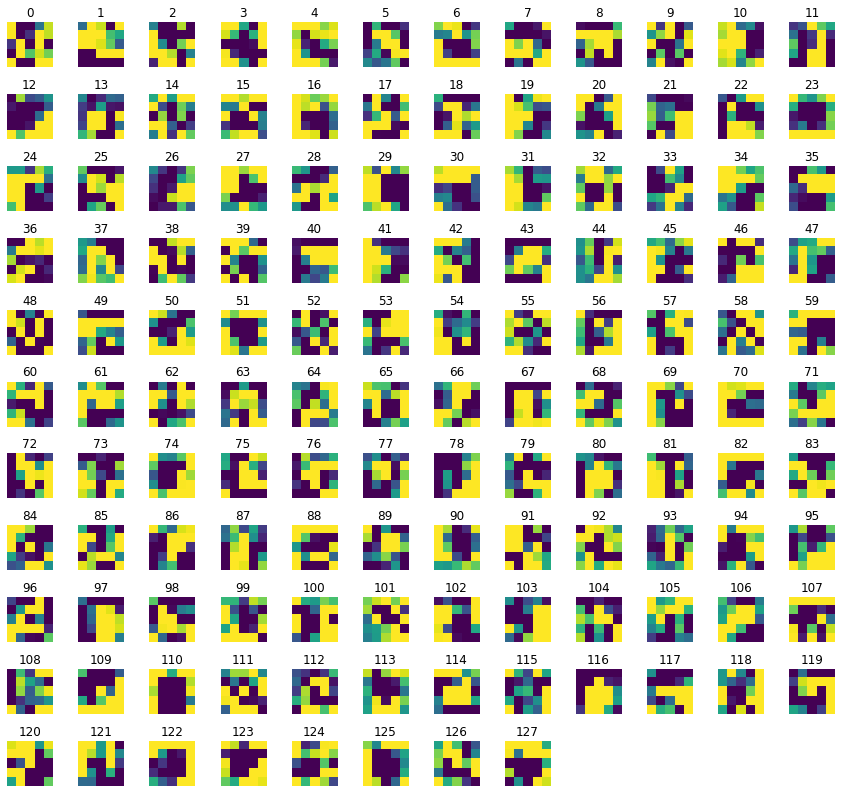

In [44]:
plot_filters_multi_channel(model.enc_2)

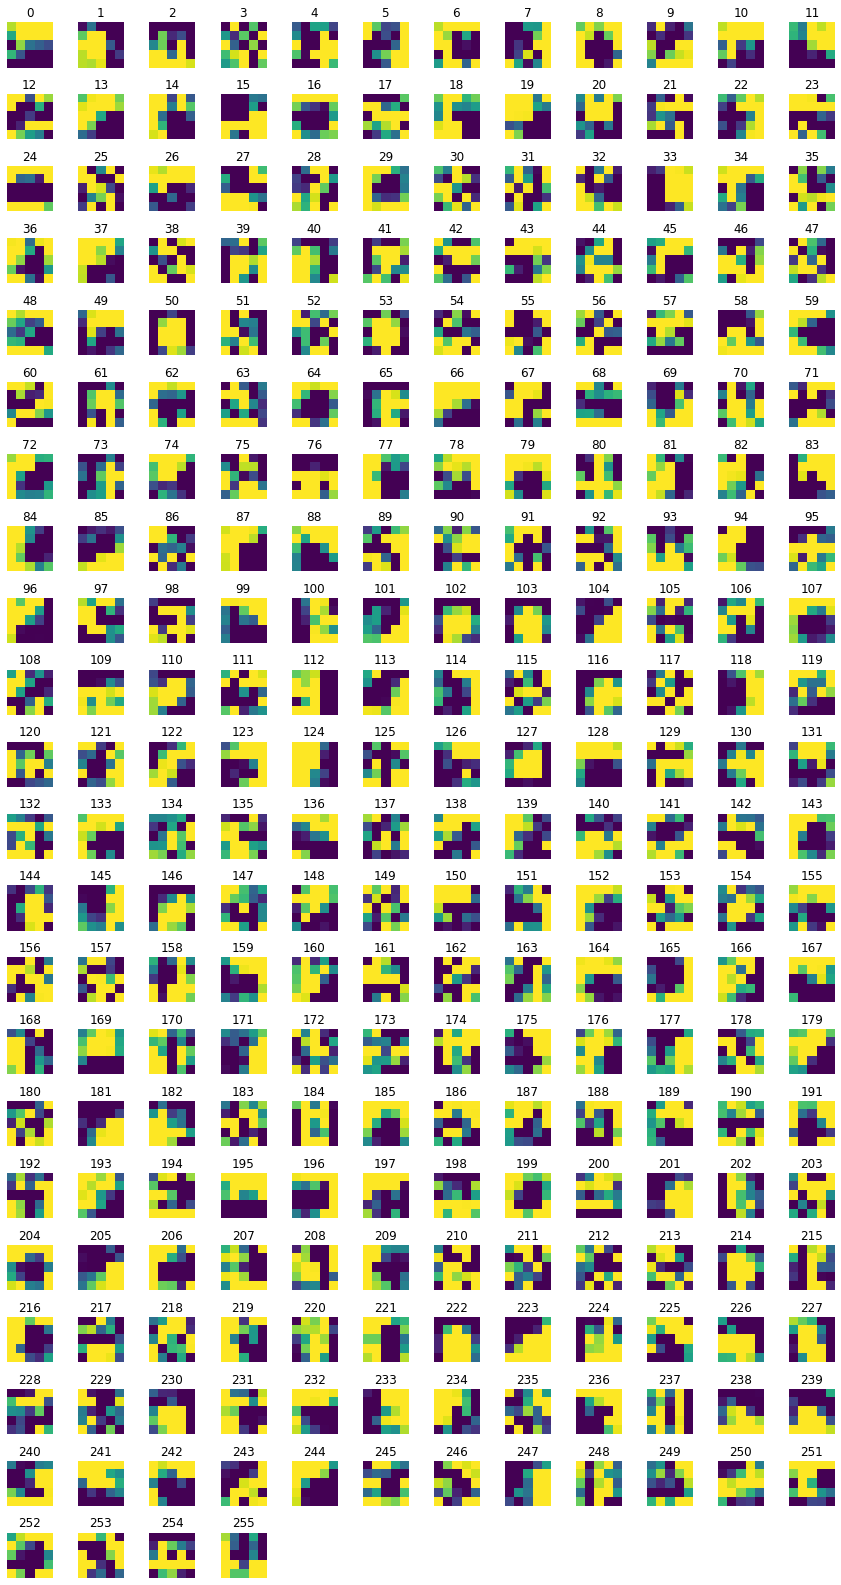

In [36]:
plot_filters_multi_channel(model.enc_3)

In [ ]:
alexnet
vgg
resnet
densenet
squeezenet